<a href="https://colab.research.google.com/github/RickyDoan/DL-TF-Potato-Leaf-Images-Classification-Prediction/blob/main/DL_TF_Potato_leaf_images_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
# # prompt: write the code to unzip a file

# import zipfile

# # Replace 'your_zip_file.zip' with the actual name of your zip file
# with zipfile.ZipFile('/content/drive/MyDrive/A Tensor Flow/Tomato-leaf-desease-detection_copy/PlantVillage.zip', 'r') as zip_ref:
#     zip_ref.extractall('/content/drive/MyDrive/A Tensor Flow/Tomato-leaf-desease-detection_copy/PlantVillage') # Replace with desired extraction path


In [5]:
image_size = (256,256)
batch_size = 32

In [6]:
data_dir = '/content/drive/MyDrive/A Tensor Flow/Tomato-leaf-desease-detection_copy/PlantVillage/PlantVillage'

In [7]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/A Tensor Flow/Tomato-leaf-desease-detection_copy/PlantVillage/PlantVillage',
    seed = 123,
    shuffle = True,
    image_size = (256,256),
    batch_size = 32
)

Found 2152 files belonging to 3 classes.


In [8]:
dataset.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [9]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 2 0 0]


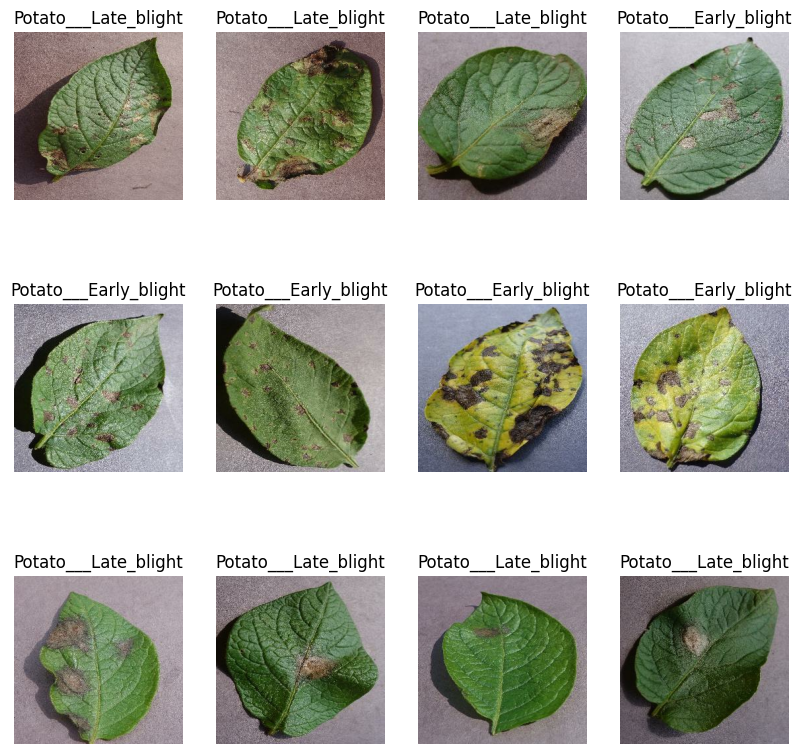

In [10]:
plt.figure(figsize=(10,10))
for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.title(dataset.class_names[labels_batch[i]])
    plt.axis('off')

In [11]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'training',
    seed = 123,
    image_size = image_size,
    batch_size = batch_size
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'validation',
    seed = 123,
    image_size = image_size,
    batch_size = batch_size
)

Found 2152 files belonging to 3 classes.
Using 1722 files for training.
Found 2152 files belonging to 3 classes.
Using 430 files for validation.


In [12]:
num_classes = len(dataset.class_names)
num_classes

3

In [13]:
model = keras.Sequential([
    keras.layers.Rescaling(1./255),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
with tf.device('/device:GPU:0'):
    epochs = 50
    history = model.fit(
        train_ds,
        validation_data = val_ds,
        epochs = epochs
    )

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 35s 528ms/step - accuracy: 0.6088 - loss: 1.1759 - val_accuracy: 0.8767 - val_loss: 0.2603
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.8940 - loss: 0.2839 - val_accuracy: 0.9093 - val_loss: 0.2468
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.9243 - loss: 0.1867 - val_accuracy: 0.9488 - val_loss: 0.1258
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.9686 - loss: 0.0866 - val_accuracy: 0.9186 - val_loss: 0.2004
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.9685 - loss: 0.0882 - val_accuracy: 0.8791 - val_loss: 0.3350
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.9625 - loss: 0.1238 - val_accuracy: 0.9581 - val_loss: 0.1240
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.9593 - loss: 0.0975 - val_accuracy: 0.9581 - val_loss: 0.1160
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.9906 - loss: 0.0342 - val_accuracy: 0.9535 -

In [15]:
model.evaluate(val_ds)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9766 - loss: 0.1231


[0.17086690664291382, 0.9651162624359131]

In [16]:
y_true = []
for images, labels in val_ds:
    y_true.extend(labels.numpy())

In [17]:
classes_name = train_ds.class_names
classes_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_all = []  # To store all predictions
y_true_all = []  # To store all true labels

for image_batch, label_batch in val_ds:
  y_pred = model.predict(image_batch)
  y_pred = np.argmax(y_pred, axis=1)

  y_pred_all.extend(y_pred)  # Accumulate predictions
  y_true_all.extend(label_batch.numpy())  # Accumulate true labels

print(classification_report(y_true_all, y_pred_all, target_names=classes_name))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step
                       precision    recall  f1-score   support

Potato___Early_blight       0.98      0.97      0.98       204
 Potato___Late_blight       0.95      0.97      0.96       197
     Potato___healthy       0.93      0.90      0.91        29

             accuracy                           0.97       430
            macro avg       0.95      0.95      0.95       430
         weighted avg       0.97      0.97      0.97       430



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


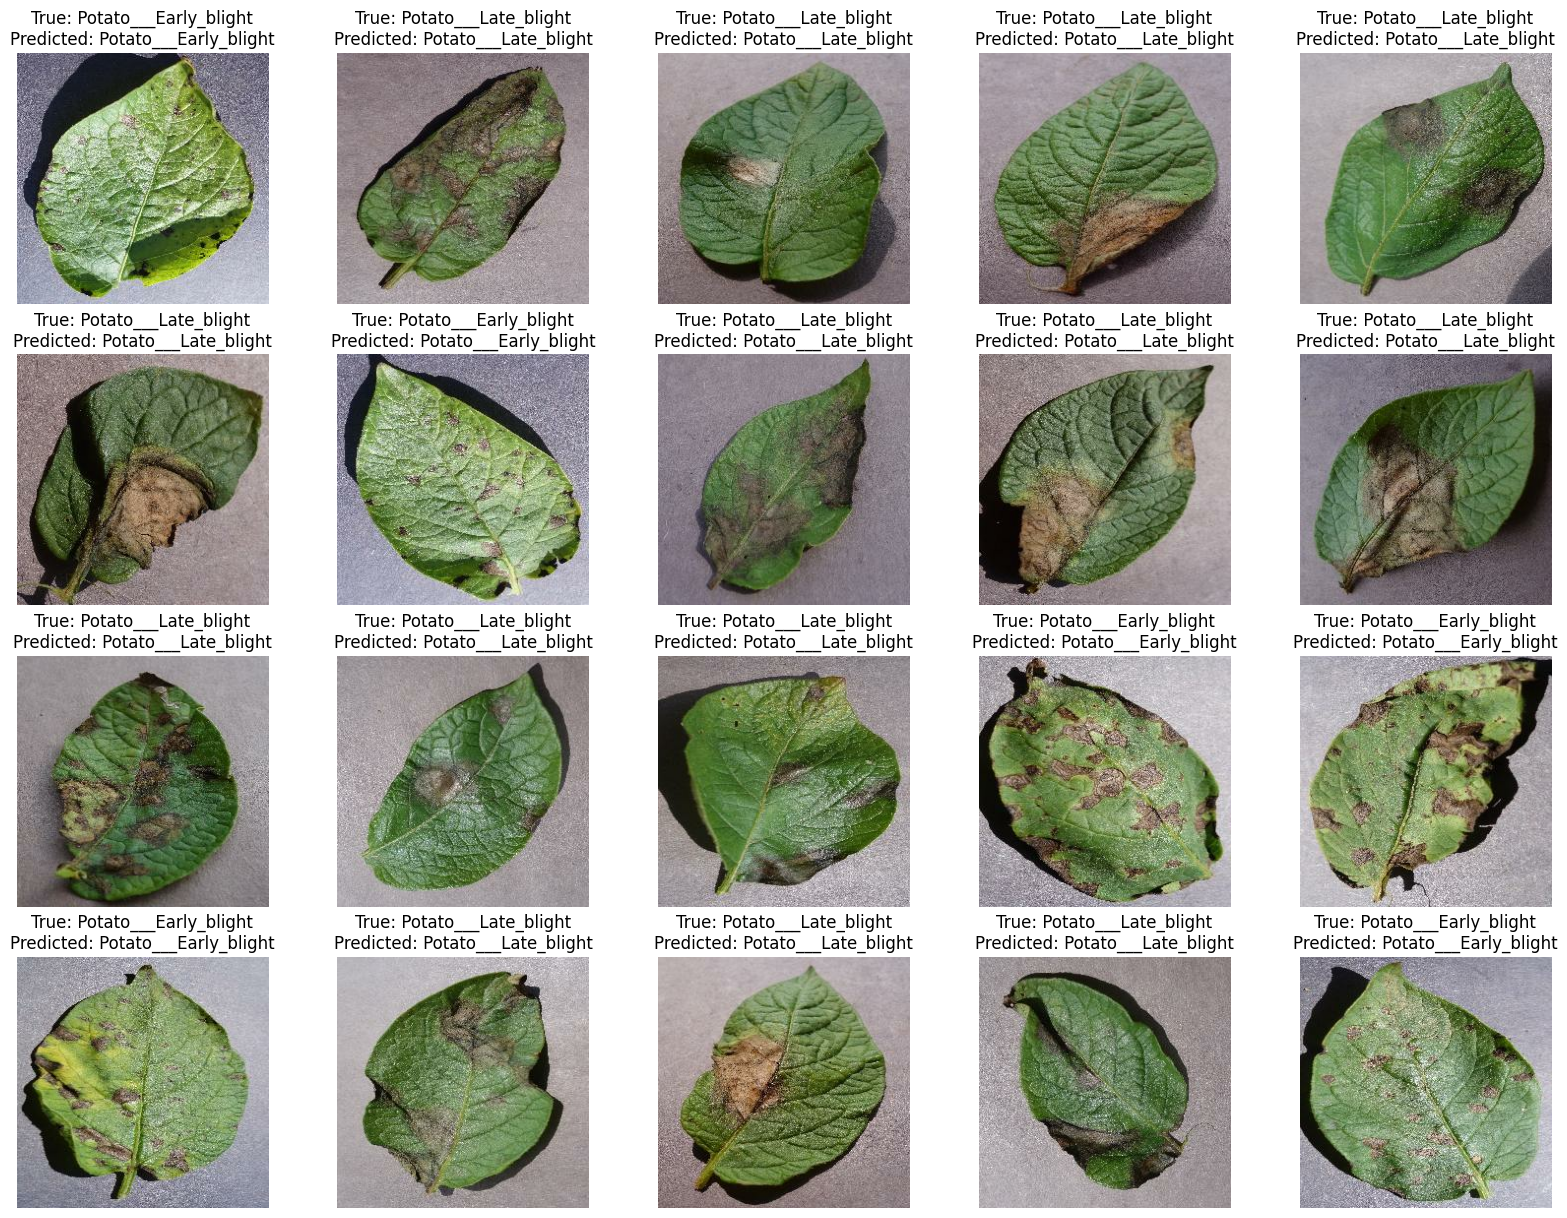

<Figure size 640x480 with 0 Axes>

In [19]:
import random

def predict_random_images(model, dataset, num_images=20):
    """Predicts the class of random images from the dataset.

    Args:
        model: The trained model.
        dataset: The image dataset.
        num_images: The number of random images to predict.
    """

    # Get a list of image batches and labels from the dataset
    image_batches, label_batches = zip(*list(dataset.as_numpy_iterator()))

    # Flatten the batches into a single list
    all_images = [image for batch in image_batches for image in batch]
    all_labels = [label for batch in label_batches for label in batch]

    # Select random image indices
    random_indices = random.sample(range(len(all_images)), num_images)
    fig, axes = plt.subplots(4, 5, figsize=(20, 15))
    axes = axes.flatten()
    for idx, index in enumerate(random_indices):
        image = all_images[index]
        true_label = all_labels[index]

        # Reshape to fit model's expected input shape
        image = tf.expand_dims(image, 0)

        prediction = model.predict(image)
        predicted_class = np.argmax(prediction)

        # print(f"Image Index: {index}")
        # print(f"True Label: {classes_name[true_label]}")
        # print(f"Predicted Label: {classes_name[predicted_class]}")
        axes[idx].imshow(all_images[index].astype("uint8"))
        axes[idx].set_title(f"True: {classes_name[true_label]}\nPredicted: {classes_name[predicted_class]}")
        axes[idx].axis("off")
    plt.show()
    plt.tight_layout()

# Example usage (assuming 'model' and 'val_ds' are defined as in your previous code)
predict_random_images(model, dataset)

In [ ]:
# from joblib import dump
# dump(model, '/content/drive/MyDrive/A Tensor Flow/model_Tomato-leaf.joblib')